In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as stats
from scipy.stats import norm
import matplotlib.pyplot as plt

#scaling and train-test split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, cross_val_predict, learning_curve

#models to review
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import IsolationForest

#crossvalidation methods

from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV

#metrics to review
from sklearn.metrics import (make_scorer, recall_score, precision_score,
f1_score, roc_auc_score, accuracy_score, roc_curve, classification_report, confusion_matrix)

#dealing with SMOTE techniques
import imblearn
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced

from sklearn.model_selection import train_test_split, RandomizedSearchCV

#import helper file py
import nbimporter
from dataclean import *

#autoreload python file
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
#neatness
%matplotlib inline

import datetime
import itertools

/Users/jessicapmouras/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#import csv data 
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data cleaning and inital EDA

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
#df.info()

In [5]:
#reorder columns
column_names = ['Class', 'Amount','Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

df = df.reindex(columns=column_names)
df.columns

Index(['Class', 'Amount', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
       'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17',
       'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28'],
      dtype='object')

In [6]:
# number of fraud cases to equalize subsample proportions
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
#assess Target column's balance
n = "\n"
normal_percent = df['Class'].value_counts()[0] / len(df)
fraud_percent = df['Class'].value_counts()[1] / len(df)
print(f"Percentage of instances of normal transactions: \
{normal_percent}\n{n}Percentages of instances of fraud transactions: {fraud_percent}")

Percentage of instances of normal transactions: 0.9982725143693799

Percentages of instances of fraud transactions: 0.001727485630620034


In [8]:
#scale the last two columns that need to be modified
std_scaler = StandardScaler()

df['scaled_amount'] = std_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = std_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [9]:
#create under-sampled dataframe balanced
df = df.sample(frac=1)

fraud_under = df[df['Class'] == 1]
nonfraud_under = df[df['Class'] == 0][:492]

df_under = pd.concat([fraud_under, nonfraud_under])

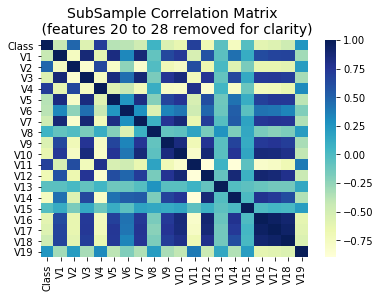

In [10]:
#correlation heatmap on subsample
df_corr = df_under.iloc[:,:20]
under_corr = df_corr.corr()

sns.heatmap(under_corr, cmap='YlGnBu')
plt.title('SubSample Correlation Matrix \n (features 20 to 28 removed for clarity)', fontsize=14);
# plt.savefig('subsample_heatmap')

In [11]:
#pairplot to see other relationships
# sns.pairplot(df_corr, palette='YlGnBu', corner=True, diag_kind='kde', kind='reg', markers='*', 
#                  plot_kws={'line_kws':{'color':'black', 'alpha':0.5}}, height=1.5);

In [12]:
#prep matricies of features for plotting

feature_v14 = df_under['V14'].loc[df_under['Class'] == 1].values
feature_v8 = df_under['V8'].loc[df_under['Class'] == 1].values
feature_v20 = df_under['V20'].loc[df_under['Class'] == 1].values

/Users/jessicapmouras/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/jessicapmouras/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/jessicapmouras/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence f

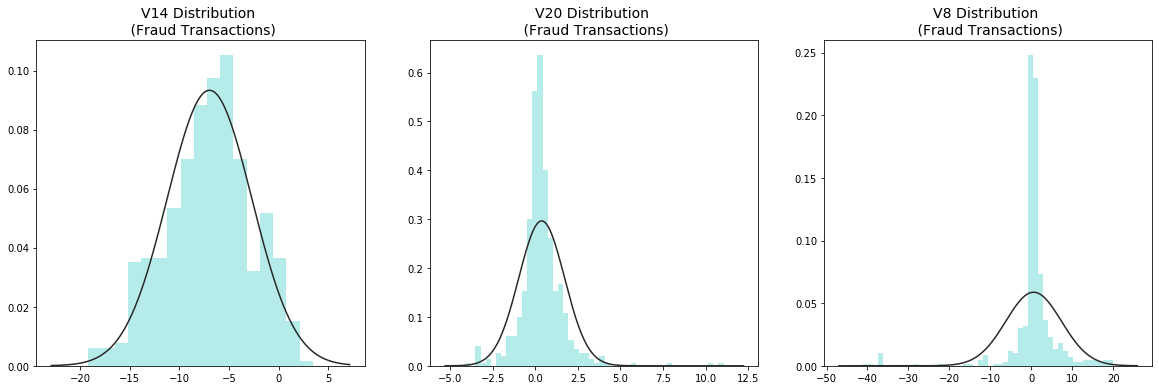

In [13]:
# distributions of specific features
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

sns.distplot(feature_v14, ax=ax1, fit= norm, kde=False, color='mediumturquoise')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

sns.distplot(feature_v20, ax=ax2, fit= norm, kde=False, color='mediumturquoise')
ax2.set_title('V20 Distribution \n (Fraud Transactions)', fontsize=14)

sns.distplot(feature_v8, ax=ax3, fit= norm, kde=False, color='mediumturquoise')
ax3.set_title('V8 Distribution \n (Fraud Transactions)', fontsize=14);

In [14]:
df_under.head()

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
6971,1,-3.499108,0.258555,-4.489558,4.853894,-6.974522,3.628382,5.431271,-1.946734,-0.775680,...,-1.052368,0.204817,-2.119007,0.170279,-0.393844,0.296367,1.985913,-0.900452,6.882027,-1.805714
8845,1,-4.727713,3.044469,-5.598354,5.928191,-2.190770,-1.529323,-4.487422,0.916392,-1.307010,...,0.650988,0.254983,0.628843,-0.238128,-0.671332,-0.033590,-1.331777,0.705698,-0.231728,-1.741887
18472,1,-1.060676,2.608579,-2.971679,4.360089,3.738853,-2.728395,1.987616,-0.357345,-2.757535,...,-0.063168,-0.207385,-0.183261,-0.103679,0.896178,0.407387,-0.130918,0.192177,-0.350511,-1.374721
81186,1,-4.384221,3.264665,-3.077158,3.403594,-1.938075,-1.221081,-3.310317,-1.111975,-1.977593,...,2.076383,-0.990303,-0.330358,0.158378,0.006351,-0.493860,-1.537652,-0.994022,-0.170757,-0.757914
150647,1,-3.632809,5.437263,-9.136521,10.307226,-5.421830,-2.864815,-10.634088,3.018127,-4.891640,...,2.309880,0.978660,-0.096130,0.432377,-0.435628,0.650893,1.693608,0.857685,-0.319086,-0.020844


## Initial training on under sampled data

### Train on the following:
+ Logisitic Regression
+ K Neighbors Classifier
+ Decision Trees Classifier
+ Random Forest Classifier
+ Gradient Boosting Classifier


### using cross validation 5 folds

In [15]:
#establish X values as feature matrix and y as target array
X = df_under.drop('Class', axis = 1).values
y = df_under['Class'].values

# test train split for undersampling. DO NOT EVER TOUCH TEST ITEMS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
lr_model = LogisticRegression().fit(X_train, y_train)

lr_train_score = cross_val_score(lr_model, X_train, y_train, cv=5)
lr_train_score.mean()

0.9326928762065423

In [17]:
dt_model = DecisionTreeClassifier().fit(X_train, y_train)

dt_train_score = cross_val_score(dt_model, X_train, y_train, cv=5)
dt_train_score.mean()


0.8996599251215069

In [18]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)

knn_train_score = cross_val_score(knn_model, X_train, y_train, cv=5)
knn_train_score.mean()

0.9237996597183891

In [19]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

rf_train_score = cross_val_score(rf_model, X_train, y_train, cv=5)
rf_train_score.mean()

0.9250493573721826

In [20]:
gb_model = GradientBoostingClassifier().fit(X_train, y_train)

gb_train_score = cross_val_score(rf_model, X_train, y_train, cv=5)
gb_train_score.mean()

0.9288791793548707

### move this helper function to PY file

In [21]:
class_models = {'gbc': GradientBoostingClassifier(),'rf': RandomForestClassifier(),'knn': KNeighborsClassifier(),
                'dt': DecisionTreeClassifier(), 'lr': LogisticRegression()}

def cross_valid_score(class_models, X_train, y_train, cv=5):
    d = {}
    final = []
    for kind, model in class_models.items():
       
        model.fit(X_train, y_train)
        training_score = cross_val_score(model, X_train, y_train, cv=5)
        d[kind]= round(float(training_score.mean()),4)
    return d
    

In [22]:
cross_valid_score(class_models, X_train, y_train, cv=5)


{'gbc': 0.9314, 'rf': 0.9289, 'knn': 0.9238, 'dt': 0.8958, 'lr': 0.9327}

### Let's try gridsearching for best parameters

In [23]:
#establish parameter dictionaries for GridSearch
lr_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'max_iter': [7000]}

knn_params = {"n_neighbors": list(range(2,6,1)),
                 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

rf_params = {'criterion': ('gini', 'entropy'), 'max_depth': [1, 2, None],
              'max_features': [1, 'sqrt', 'log2', None]}

dt_params = {'criterion': ('gini', 'entropy'), 'max_depth': [1, 2, None],
              'max_features': [1, 'sqrt', 'log2', None]}

gbc_params = {'loss': ('deviance', 'exponential'), 'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100]}


#### KNN evaluation undersample gridsearch

In [24]:
#KNN scores gridsearch analysis on test data
gridsear_knn = GridSearchCV(KNeighborsClassifier(), knn_params)

gridsear_knn.fit(X_train, y_train)
# best parameters to be used
gridsear_knn.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [25]:


knn_best = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
knn_best.fit(X_train, y_train)
y_pred_knn = knn_best.predict(X_train)

knn_recall = recall_score(y_train, y_pred_knn)
knn_precision = precision_score(y_train, y_pred_knn)
knn_f1 = f1_score(y_train, y_pred_knn)
knn_accuracy = accuracy_score(y_train, y_pred_knn)
print(f'KNN recall score: {knn_recall}\nKNN precision score: {knn_precision} \
    \nKNN f1 score: {knn_f1}\nKNN accuracy score: {knn_accuracy}')



KNN recall score: 0.9185750636132316
KNN precision score: 0.9730458221024259     
KNN f1 score: 0.9450261780104713
KNN accuracy score: 0.9466327827191868


#### LogisticRegression evaluation undersample gridsearch

In [26]:
#LR scores gridsearch analysis on test data
gridsear_lr = GridSearchCV(LogisticRegression(), lr_params)

gridsear_lr.fit(X_train, y_train)
# best parameters to be used
gridsear_lr.best_estimator_

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=7000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
#LR scores gridsearch analysis on test data
gridsear_lr = GridSearchCV(LogisticRegression(), lr_params)

gridsear_lr.fit(X_train, y_train)
# best parameters to be used
gridsear_lr.best_estimator_
lr_best = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=7000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

lr_best.fit(X_train, y_train)
y_pred_lr = lr_best.predict(X_train)

lr_recall = recall_score(y_train, y_pred_lr)
lr_precision = precision_score(y_train, y_pred_lr)
lr_f1 = f1_score(y_train, y_pred_lr)
lr_accuracy = accuracy_score(y_train, y_pred_lr)
print(f'LogisticRegression recall score: {lr_recall}\nLogisticRegression  precision score: {lr_precision} \
    \nLogisticRegression  f1 score: {lr_f1}\nLogisticRegression  accuracy score: {lr_accuracy}')

LogisticRegression recall score: 0.9134860050890585
LogisticRegression  precision score: 0.9755434782608695     
LogisticRegression  f1 score: 0.9434954007884363
LogisticRegression  accuracy score: 0.9453621346886912


#### DecisionTree evaluation undersample gridsearch

In [28]:
#DT scores gridsearch analysis on test data
gridsear_dt = GridSearchCV(DecisionTreeClassifier(), dt_params)

gridsear_dt.fit(X_train, y_train)
# best parameters to be used
gridsear_dt.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
#DT scores gridsearch analysis on test data
gridsear_dt = GridSearchCV(DecisionTreeClassifier(), dt_params)

gridsear_dt.fit(X_train, y_train)
# best parameters to be used
gridsear_dt.best_estimator_
dt_best = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

dt_best.fit(X_train, y_train)
y_pred_dt = dt_best.predict(X_train)

dt_recall = recall_score(y_train, y_pred_dt)
dt_precision = precision_score(y_train, y_pred_dt)
dt_f1 = f1_score(y_train, y_pred_dt)
dt_accuracy = accuracy_score(y_train, y_pred_dt)
print(f'DecisionTree recall score: {dt_recall}\nDecisionTree  precision score: {dt_precision} \
    \nDecisionTree  f1 score: {dt_f1}\nDecisionTree  accuracy score: {dt_accuracy}')

DecisionTree recall score: 0.8676844783715013
DecisionTree  precision score: 0.9884057971014493     
DecisionTree  f1 score: 0.9241192411924118
DecisionTree  accuracy score: 0.928843710292249


#### RandomForest evaluation undersample gridsearch

In [30]:
#RF scores gridsearch analysis on test data
gridsear_rf = GridSearchCV(RandomForestClassifier(), rf_params)

gridsear_rf.fit(X_train, y_train)
# best parameters to be used
gridsear_rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
#RF scores gridsearch analysis on test data
gridsear_rf = GridSearchCV(RandomForestClassifier(), rf_params)

gridsear_rf.fit(X_train, y_train)
# best parameters to be used
gridsear_rf.best_estimator_
rf_best = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

rf_best.fit(X_train, y_train)
y_pred_rf = rf_best.predict(X_train)

rf_recall = recall_score(y_train, y_pred_dt)
rf_precision = precision_score(y_train, y_pred_dt)
rf_f1 = f1_score(y_train, y_pred_dt)
rf_accuracy = accuracy_score(y_train, y_pred_dt)
print(f'RandomForest recall score: {rf_recall}\nRandomForest  precision score: {rf_precision} \
    \nRandomForest  f1 score: {rf_f1}\nRandomForest  accuracy score: {rf_accuracy}')

RandomForest recall score: 0.8676844783715013
RandomForest  precision score: 0.9884057971014493     
RandomForest  f1 score: 0.9241192411924118
RandomForest  accuracy score: 0.928843710292249


#### GradientBoosting evaluation undersample gridsearch

In [32]:
#GBC scores gridsearch analysis on test data
gridsear_gbc = GridSearchCV(GradientBoostingClassifier(), gbc_params)

gridsear_gbc.fit(X_train, y_train)
# best parameters to be used
gridsear_gbc.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [33]:
#GBC scores gridsearch analysis on test data
gridsear_gbc = GridSearchCV(GradientBoostingClassifier(), gbc_params)

gridsear_gbc.fit(X_train, y_train)
# best parameters to be used
gridsear_gbc.best_estimator_
gbc_best = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

gbc_best.fit(X_train, y_train)
y_pred_gbc = gbc_best.predict(X_train)

gbc_recall = recall_score(y_train, y_pred_dt)
gbc_precision = precision_score(y_train, y_pred_dt)
gbc_f1 = f1_score(y_train, y_pred_dt)
gbc_accuracy = accuracy_score(y_train, y_pred_dt)
print(f'GradientBoosting  recall score: {gbc_recall}\nGradientBoosting precision score: {gbc_precision} \
    \nGradientBoosting f1 score: {gbc_f1}\nGradientBoosting accuracy score: {gbc_accuracy}')

GradientBoosting  recall score: 0.8676844783715013
GradientBoosting precision score: 0.9884057971014493     
GradientBoosting f1 score: 0.9241192411924118
GradientBoosting accuracy score: 0.928843710292249


In [34]:
lr_yhat = cross_val_predict(lr_best, X_train, y_train, cv=5, method='predict_proba')

knn_yhat = cross_val_predict(knn_best, X_train, y_train, cv=5, method='predict_proba')

dt_yhat = cross_val_predict(dt_best, X_train, y_train, cv=5, method='predict_proba')

rf_yhat = cross_val_predict(rf_best, X_train, y_train, cv=5, method='predict_proba')

gbc_yhat = cross_val_predict(gbc_best, X_train, y_train, cv=5, method='predict_proba')


# lr_yhat = lr_best.predict(X_train)

# knn_yhat = knn_best.predict(X_train)

# dt_yhat = dt_best.predict(X_train)

# rf_yhat = rf_best.predict(X_train)

# gbc_yhat = gbc_best.predict(X_train)

In [35]:
lr_fpr, lr_tpr, lr_thresh = roc_curve(y_train, lr_yhat[:, 1])

knn_fpr, knn_tpr, knn_thresh = roc_curve(y_train, knn_yhat[:, 1])

dt_fpr, dt_tpr, dt_thresh = roc_curve(y_train, dt_yhat[:, 1])

rf_fpr, rf_tpr, rf_thresh = roc_curve(y_train, rf_yhat[:, 1])

gbc_fpr, gbc_tpr, gbc_thresh = roc_curve(y_train, gbc_yhat[:, 1])

In [36]:
# def roc_auc_score(y_train, y_hat):
    

# roc_auc_score(y_train, lr_yhat)
# roc_auc_score(y_train, knn_yhat)
# roc_auc_score(y_train, dt_yhat)

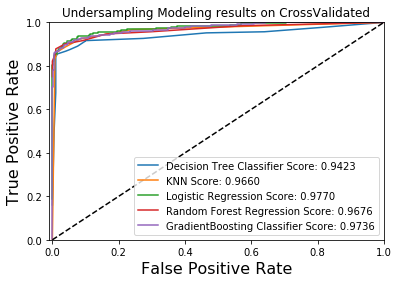

In [37]:
plt.plot(dt_fpr, dt_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, dt_yhat[:, 1])))
plt.plot(knn_fpr, knn_tpr, label='KNN Score: {:.4f}'.format(roc_auc_score(y_train, knn_yhat[:, 1])))
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression Score: {:.4f}'.format(roc_auc_score(y_train, lr_yhat[:, 1])))
plt.plot(rf_fpr, rf_tpr, label='Random Forest Regression Score: {:.4f}'.format(roc_auc_score(y_train, rf_yhat[:, 1])))
plt.plot(gbc_fpr, gbc_tpr, label='GradientBoosting Classifier Score: {:.4f}'.format(roc_auc_score(y_train, gbc_yhat[:, 1])))

plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend(loc='lower right')
plt.title('Undersampling Modeling results on CrossValidated')
plt.show()

# Done with undersampling - back to OG dataset

In [38]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [68]:


print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1).
y = df['Class'].values



No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


## Isolation Forest on original data

In [40]:
df

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
111614,0,1.275019,-0.574140,0.283314,-0.680821,-0.989882,-0.947704,-0.372033,-0.191263,-1.235369,...,0.311410,0.707679,-0.148969,0.583785,0.569072,-0.152944,-0.016070,0.011696,-0.113744,-0.474179
146861,0,-0.329817,1.386139,-0.599828,-0.649911,0.852541,-0.787065,0.998479,-0.096421,0.260111,...,-0.391606,-0.808397,0.147578,0.574111,-0.316493,0.123639,0.442730,0.208914,-0.317606,-0.145023
75104,0,1.517539,-0.276266,-0.607744,-0.898072,-0.092987,-0.810162,-0.009580,-0.377665,-1.168628,...,0.131372,0.343699,-0.296244,-0.552031,0.945960,-0.024978,-0.026811,-0.006746,-0.293258,-0.819445
160659,0,1.945615,0.233408,-2.708821,1.382179,1.199875,-0.561540,0.691269,-0.259857,0.290790,...,-0.052585,-0.136515,-0.127208,-0.118055,0.520093,-0.483740,-0.020506,-0.019040,-0.047936,0.394081
45839,0,-1.764324,2.084287,0.550649,0.447604,-0.377357,-0.292535,-0.098860,-2.298139,-0.533032,...,2.453421,-0.375215,0.218335,0.386616,0.364851,-0.382008,-0.311200,-0.051257,-0.193306,-1.101200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186901,0,2.100712,0.251935,-2.160098,0.242027,0.894626,-0.639714,0.308869,-0.333269,0.419647,...,0.162829,0.653809,-0.103202,0.005264,0.414884,-0.096959,-0.001325,-0.026842,-0.296616,0.684133
182559,0,-0.684890,0.932883,1.751202,-0.301226,-0.695380,0.820428,-1.587418,-3.258637,-0.004759,...,-0.533217,0.064980,-0.086526,1.113816,1.223179,0.347707,0.042823,0.189553,-0.278065,0.645239
93144,0,1.316193,-0.009926,-0.137555,0.587167,-0.308887,-0.799481,0.042878,-0.080183,0.612074,...,-0.133028,-0.349540,-0.136149,-0.126894,0.639381,0.595106,-0.070506,-0.010366,-0.353229,-0.643232
51101,0,-3.182327,-0.261144,1.874477,1.470580,-0.938417,1.526957,-1.309723,1.489185,0.669822,...,0.106734,0.730023,-0.013819,-0.213343,0.314837,-0.102277,-0.235091,-0.075115,-0.315368,-1.053420


In [41]:
X = df.drop('Class', axis=1)
y = df['Class']

In [42]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [43]:
#Test train split standard 80 / 20
og_Xtrain, og_Xtest, og_ytrain, og_ytest = train_test_split(X, y, 
                                                    test_size=0.2, random_state=11)

## move this to helper function file

In [44]:
def plot_confusion_matrix(cm, title, classes=['1', '0'],
                          cmap=plt.cm.Greens, save=False, saveas="MyFigure.png"):
    
    # print Confusion matrix with blue gradient colours
    
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.1%'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    if save:
        plt.savefig(saveas, dpi=100)

In [45]:
# Fit and train Isolation Forest on training data
# this is pretty standard parameters
clfIF = IsolationForest(max_samples=0.25, random_state=11, contamination=0.05, n_estimators=100, n_jobs=-1)

start = datetime.datetime.now()
clfIF.fit(og_Xtrain,og_ytrain)
y_pred_train = clfIF.predict(og_Xtrain)
end = datetime.datetime.now()
print (end-start)

#fix the target class coing such that classification report works
y_pred_train[y_pred_train==1] = 0
y_pred_train[y_pred_train==-1] = 1

/Users/jessicapmouras/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


0:00:29.109104


             precision    recall  f1-score   support

          0       1.00      0.95      0.97    227440
          1       0.03      0.85      0.06       405

avg / total       1.00      0.95      0.97    227845

AUC:  90.2%


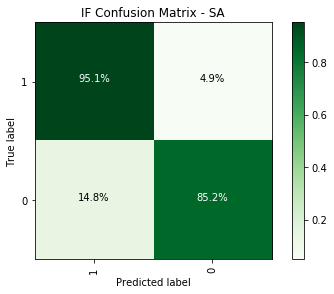

In [46]:

print(classification_report(og_ytrain, y_pred_train))
print ("AUC: ", "{:.1%}".format(roc_auc_score(og_ytrain, y_pred_train)))
cm = confusion_matrix(og_ytrain, y_pred_train)
plot_confusion_matrix(cm, title="IF Confusion Matrix - SA", save=False, saveas="IF_SA.png")

In [47]:
# this is now with lower contamination rate
clfIF = IsolationForest(max_samples=0.25, random_state=11, contamination=0.02, n_estimators=100, n_jobs=-1)

start = datetime.datetime.now()
clfIF.fit(og_Xtrain,og_ytrain)
y_pred_train = clfIF.predict(og_Xtrain)
end = datetime.datetime.now()
print (end-start)

#fix the target class coing such that classification report works
y_pred_train[y_pred_train==1] = 0
y_pred_train[y_pred_train==-1] = 1

0:00:29.293449


             precision    recall  f1-score   support

          0       1.00      0.98      0.99    227440
          1       0.07      0.77      0.13       405

avg / total       1.00      0.98      0.99    227845

AUC:  87.7%


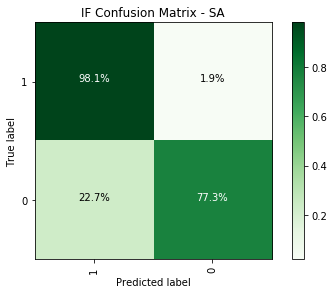

In [48]:
print(classification_report(og_ytrain, y_pred_train))
print ("AUC: ", "{:.1%}".format(roc_auc_score(og_ytrain, y_pred_train)))
cm = confusion_matrix(og_ytrain, y_pred_train)
plot_confusion_matrix(cm, title="IF Confusion Matrix - SA", save=False, saveas="IF_SA.png")

In [49]:
(unique, counts) = np.unique(og_ytrain, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies 

array([[     0, 227440],
       [     1,    405]])

In [50]:
scoring = {'AUC': 'roc_auc', 'Recall': make_scorer(recall_score, pos_label=1)}

In [51]:

## REVIST THIS TO SEE IF IT WORKS at 4:30pm
# gs_con = GridSearchCV(IsolationForest(random_state=11, max_samples=0.10, n_estimators=150, n_jobs=-1),
#                   param_grid={'contamination': np.arange(0.01, 0.25, 0.05)},
#                   scoring=scoring, refit='Recall')
# gs_con.fit(og_Xtrain, og_ytrain)
# results = gs_con.cv_results_

# SMOTE analysis - Logistic Regression for depiction only

In [76]:
X_smote = df.drop('Class', axis=1)
y_smote = df['Class']

In [78]:
# # decision tree  on imbalanced dataset with SMOTE oversampling and random undersampling
# from numpy import mean
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.tree import DecisionTreeClassifier
# from imblearn.pipeline import Pipeline
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler

# # define dataset
# X_smote = df.drop('Class', axis=1)
# y_smote = df['Class']
# # define pipeline
# model = LogisticRegression()
# over = SMOTE()
# steps = [('over', over), ('model', model)]
# pipeline = Pipeline(steps=steps)
# # evaluate pipeline
# cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
# scores = cross_val_score(pipeline, X_smote, y_smote, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))

Process ForkPoolWorker-32:
Process ForkPoolWorker-31:
Traceback (most recent call last):


KeyboardInterrupt: 

In [55]:
# from sklearn.model_selection import StratifiedShuffleSplit

# print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
# print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

# sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# for train_index, test_index in sss.split(X_smote, y_smote):
#     print("Train:", train_index, "Test:", test_index)
#     original_Xtrain, original_Xtest = X_smote.iloc[train_index], X_smote.iloc[test_index]
#     original_ytrain, original_ytest = y_smote.iloc[train_index], y_smote.iloc[test_index]
    
# original_Xtrain = original_Xtrain.values
# original_Xtest = original_Xtest.values
# original_ytrain = original_ytrain.values
# original_ytest = original_ytest.values

# # See if both the train and test label distribution are similarly distributed
# train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
# test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
# print('-' * 100)

# print('Label Distributions: \n')
# print(train_counts_label/ len(original_ytrain))
# print(test_counts_label/ len(original_ytest))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 56960  56961  56962 ... 284804 284805 284806] Test: [    0     1     2 ... 56959 57005 57250]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 56960  56961  56962 ... 113928 113929 113930]
Train: [     0      1      2 ... 284804 284805 284806] Test: [111776 111845 112175 ... 170888 170889 170890]
Train: [     0      1      2 ... 284804 284805 284806] Test: [164182 164941 165016 ... 227845 227846 227847]
Train: [     0      1      2 ... 227845 227846 227847] Test: [226855 227533 227848 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [56]:
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from imblearn.pipeline import Pipeline
# from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

# print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
# print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# # List to append the score and then find the average
# accuracy_lst = []
# precision_lst = []
# recall_lst = []
# f1_lst = []
# auc_lst = []

# # Classifier with optimal parameters
# # log_reg_sm = grid_log_reg.best_estimator_
# log_reg_sm = LogisticRegression()


# log_reg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'max_iter': [7000]}

# rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, refit=True)


# # Implementing SMOTE Technique 
# # Cross Validating the right way
# # Parameters

# # define pipeline
# steps = [('over', SMOTE()), ('model', log_reg_sm)]
# pipeline = Pipeline(steps=steps)


# for train, test in sss.split(original_Xtrain, original_ytrain):
#     pipeline = Pipeline(steps=steps) # SMOTE happens during Cross Validation not before..
#     model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
#     best_est = rand_log_reg.best_estimator_
#     prediction = best_est.predict(original_Xtrain[test])
    
#     accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
#     precision_lst.append(precision_score(original_ytrain[test], prediction))
#     recall_lst.append(recall_score(original_ytrain[test], prediction))
#     f1_lst.append(f1_score(original_ytrain[test], prediction))
#     auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
# print('---' * 45)
# print('')
# print("accuracy: {}".format(np.mean(accuracy_lst)))
# print("precision: {}".format(np.mean(precision_lst)))
# print("recall: {}".format(np.mean(recall_lst)))
# print("f1: {}".format(np.mean(f1_lst)))
# print('---' * 45)

## NEED TO DECIDE IF I WANT TO DELETE

In [57]:
#Test train split standard 80 / 20
smote_Xtrain, smote_Xtest, smote_ytrain, smote_ytest = train_test_split(X_smote, y_smote, 
                                                    test_size=0.2, random_state=11)

In [58]:
# What the model does when we don't fix the imbalance
# Model appears to be 'really high scoring'
# But we know that because it just predicting the majority class


# from numpy import mean
# # define model
# model = LogisticRegression()
# # evaluate pipeline
# cross_val = StratifiedKFold(n_splits=5, random_state=1)
# scores = cross_val_score(model, smote_Xtrain, smote_ytrain, scoring='accuracy', cv=cross_val, n_jobs=-1)
# print('Mean Accuracy: %.3f' % mean(scores))

In [59]:

# Oversample with SMOTE - ROC AUC Logistic Regression
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


# define pipeline
steps = [('over', SMOTE()), ('model', LogisticRegression())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cross_val = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
scores = cross_val_score(pipeline, smote_Xtrain, smote_ytrain, scoring='roc_auc', cv=cross_val, n_jobs=-1)
print('Mean ROC AUC Validation: %.3f' % mean(scores))

/Users/jessicapmouras/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, defaultdict


KeyboardInterrupt: 

In [ ]:
# smote_lr_yhat = cross_val_predict(lr_best, smote_Xtrain, smote_ytrain, cv=5, method='predict_proba')

In [ ]:

# Oversample with SMOTE - Accuracy Logistic Regression
# from collections import Counter
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from imblearn.pipeline import Pipeline
# from imblearn.over_sampling import SMOTE


# # define pipeline
# steps = [('over', SMOTE()), ('model', LogisticRegression())]
# pipeline = Pipeline(steps=steps)
# # evaluate pipeline
# cross_val = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
# scores = cross_val_score(pipeline, smote_Xtrain, smote_ytrain, scoring='accuracy', cv=cross_val, n_jobs=-1)
# print('Mean Accuracy Validation: %.3f' % mean(scores))

In [ ]:
# # Oversample with SMOTE - Precision Logistic Regression
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# define pipeline
steps = [('over', SMOTE()), ('model', LogisticRegression())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cross_val = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
scores = cross_val_score(pipeline, smote_Xtest, smote_ytest, scoring='precision', cv=cross_val, n_jobs=-1)
print('Mean Precision Validation: %.3f' % mean(scores))

In [ ]:
# Oversample with SMOTE - Recall Logistic Regression
# from collections import Counter
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from imblearn.pipeline import Pipeline
# from imblearn.over_sampling import SMOTE


# # define pipeline
# steps = [('over', SMOTE()), ('model', LogisticRegression())]
# pipeline = Pipeline(steps=steps)
# # evaluate pipeline
# cross_val = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
# scores = cross_val_score(pipeline, smote_Xtrain, smote_ytrain, scoring='recall', cv=cross_val, n_jobs=-1)
# print('Mean Recall: %.3f' % mean(scores))

In [ ]:

# # grid search k value for SMOTE oversampling for imbalanced classification

# from numpy import mean
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.tree import DecisionTreeClassifier
# from imblearn.pipeline import Pipeline
# from imblearn.over_sampling import SMOTE


# # values to evaluate
# k_values = [1, 2, 3, 4, 5]
# for k in k_values:
# # define pipeline
#     model = LogisticRegression()
#     over = SMOTE(k_neighbors=k)
#     steps = [('over', over), ('model', model)]
#     pipeline = Pipeline(steps=steps)
#     # evaluate pipeline
#     cv = StratifiedKFold(n_splits=10, random_state=1)
#     scores = cross_val_score(pipeline, smote_Xtrain, smote_ytrain, scoring='roc_auc', cv=cv, n_jobs=-1)
#     score = mean(scores)
#     print('> k=%d, Mean ROC AUC: %.3f' % (k, score))